Import Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import librosa.display
import librosa
import os
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load TESS Data

In [2]:
tess_paths = []
tess_labels  = []


for dirname, _, filenames in os.walk('./data/TESS'):
    for filename in filenames:
        tess_paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1].split('.')[0]
        if label == 'ps':
            tess_labels.append('surprise')
        else:
            tess_labels.append(label)


In [3]:
# creating a dataframe
tess_df = pd.DataFrame()
tess_df['path'] = tess_paths
tess_df['emotion'] = tess_labels
tess_df.head()

,path,emotion
0,./data/TESS\OAF_angry\OAF_back_angry.wav,angry
1,./data/TESS\OAF_angry\OAF_bar_angry.wav,angry
2,./data/TESS\OAF_angry\OAF_base_angry.wav,angry
3,./data/TESS\OAF_angry\OAF_bath_angry.wav,angry
4,./data/TESS\OAF_angry\OAF_bean_angry.wav,angry


In [4]:
tess_df['emotion'].value_counts()

emotion
angry       400
disgust     400
fear        400
happy       400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64

## Load SAVEE Data

In [5]:
savee_paths = []
savee_labels = []

for dirname, _, filenames in os.walk('./data/SAVEE'):
    for filename in filenames:
        if filename.endswith('.wav'):
            savee_paths.append(os.path.join(dirname, filename))
            part = filename.split('_')[1]
            ele = part[:-6]
            if ele=='a':
                savee_labels.append('angry')
            elif ele=='d':
                savee_labels.append('disgust')
            elif ele=='f':
                savee_labels.append('fear')
            elif ele=='h':
                savee_labels.append('happy')
            elif ele=='n':
                savee_labels.append('neutral')
            elif ele=='sa':
                savee_labels.append('sad')
            else:
                savee_labels.append('surprise')

In [6]:
savee_df = pd.DataFrame()
savee_df['path'] = savee_paths
savee_df['emotion'] = savee_labels
savee_df.head()

,path,emotion
0,./data/SAVEE\ALL\DC_a01.wav,angry
1,./data/SAVEE\ALL\DC_a02.wav,angry
2,./data/SAVEE\ALL\DC_a03.wav,angry
3,./data/SAVEE\ALL\DC_a04.wav,angry
4,./data/SAVEE\ALL\DC_a05.wav,angry


In [7]:
savee_df['emotion'].value_counts()

emotion
neutral     120
angry        60
disgust      60
fear         60
happy        60
sad          60
surprise     60
Name: count, dtype: int64

In [8]:
df = pd.concat([tess_df, savee_df], ignore_index=True)

In [9]:
df.head()

,path,emotion
0,./data/TESS\OAF_angry\OAF_back_angry.wav,angry
1,./data/TESS\OAF_angry\OAF_bar_angry.wav,angry
2,./data/TESS\OAF_angry\OAF_base_angry.wav,angry
3,./data/TESS\OAF_angry\OAF_bath_angry.wav,angry
4,./data/TESS\OAF_angry\OAF_bean_angry.wav,angry


### Exploratory Data Analysis

emotion
neutral     520
angry       460
disgust     460
fear        460
happy       460
surprise    460
sad         460
Name: count, dtype: int64


<Axes: xlabel='emotion', ylabel='count'>

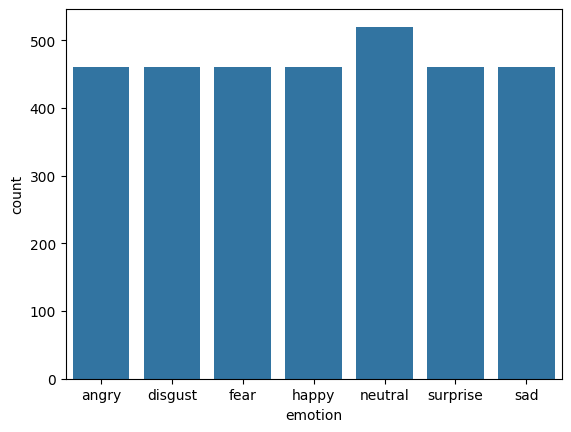

In [10]:
print(df['emotion'].value_counts())
sns.countplot(data=df, x='emotion') # the dataset is balanced

In [11]:
def waveplot(data, sample_rate, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sample_rate)
    plt.show()


def spectrogram(data, sample_rate, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sample_rate, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar


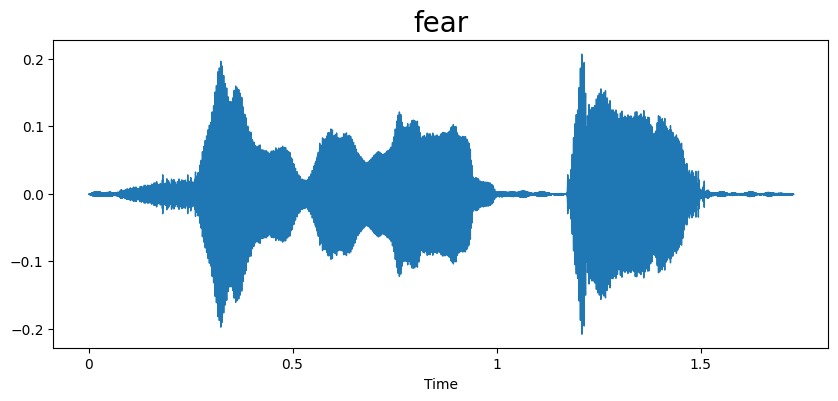

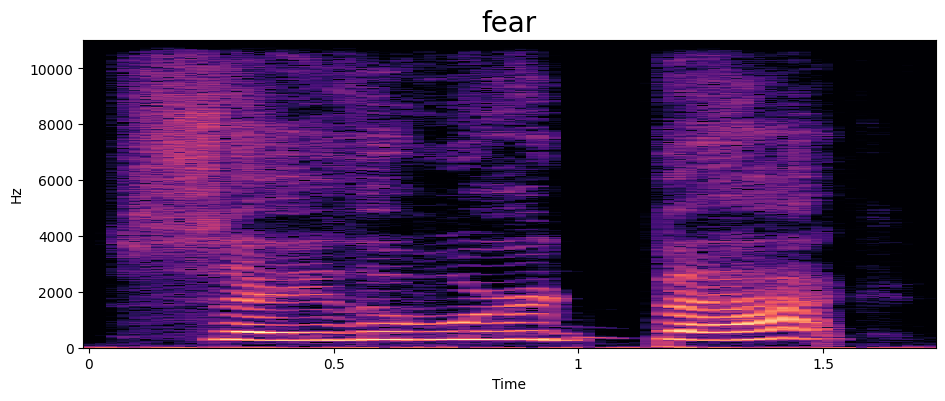

In [12]:
# Filters the DataFrame to get only the rows where the 'emotion' column matches the specified emotion value.
emotion = 'fear'
p = df['path'][df['emotion']==emotion].iloc[0]
data, sampling_rate = librosa.load(p)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(p)

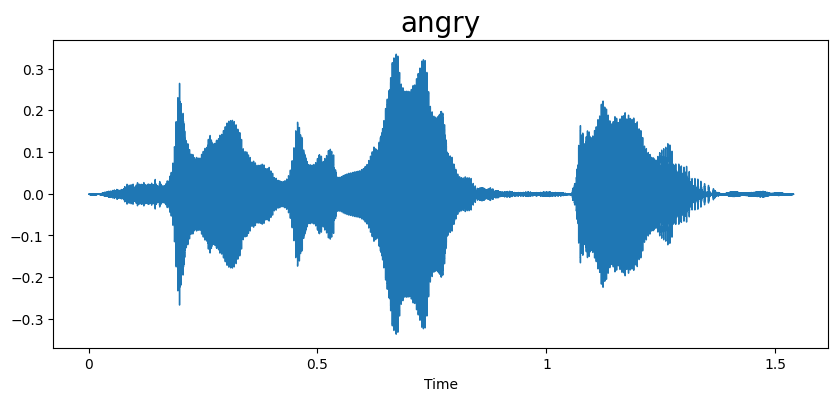

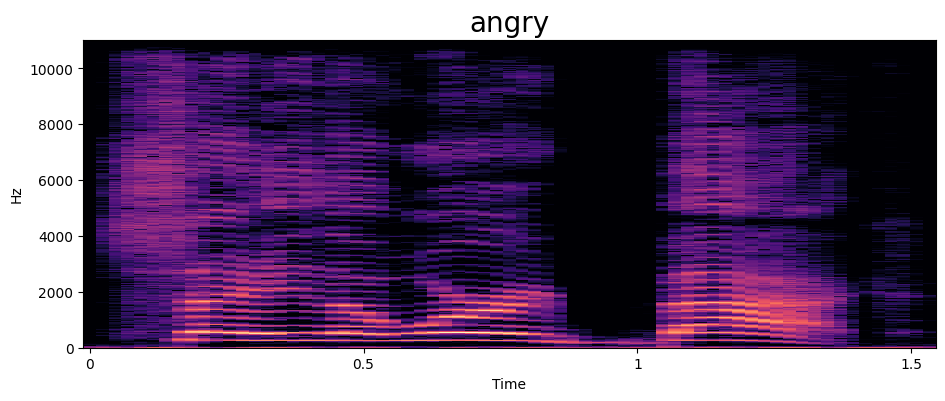

In [13]:
# Filters the DataFrame to get only the rows where the 'emotion' column matches the specified emotion value.
emotion = 'angry'
p = df['path'][df['emotion']==emotion].iloc[0]
data, sampling_rate = librosa.load(p)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(p)

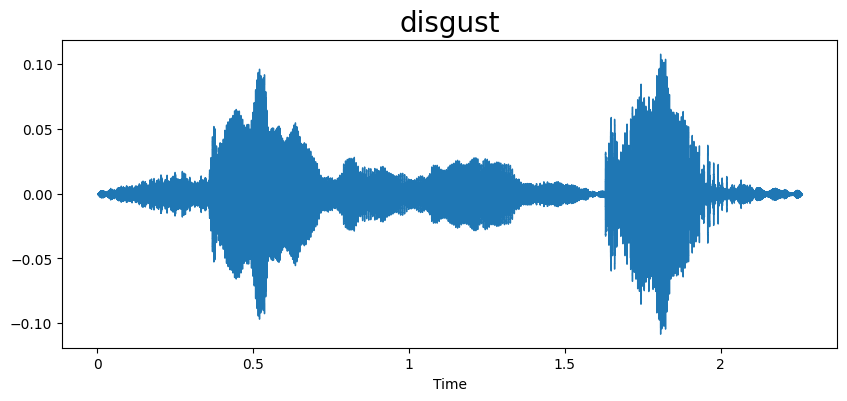

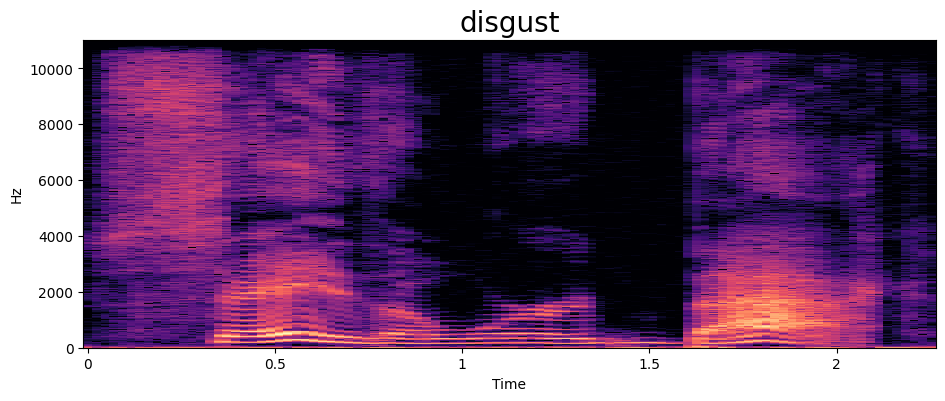

In [14]:
emotion = 'disgust'
p = df['path'][df['emotion']==emotion].iloc[0]
data, sampling_rate = librosa.load(p)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(p)

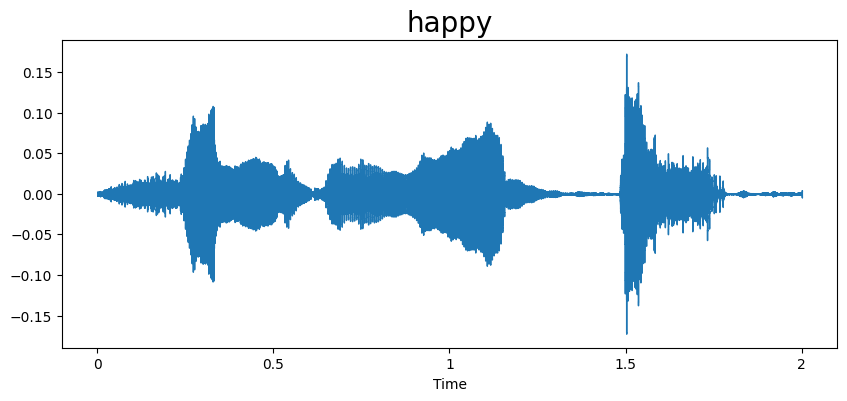

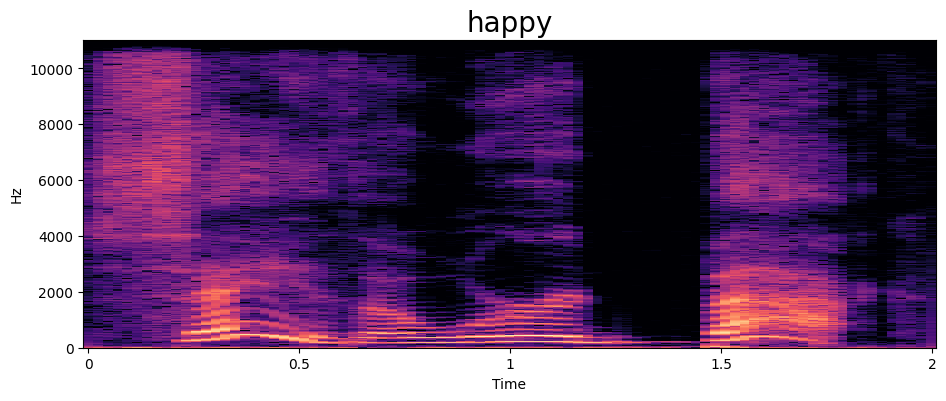

In [15]:
emotion = 'happy'
p = df['path'][df['emotion']==emotion].iloc[0]
data, sampling_rate = librosa.load(p)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(p)

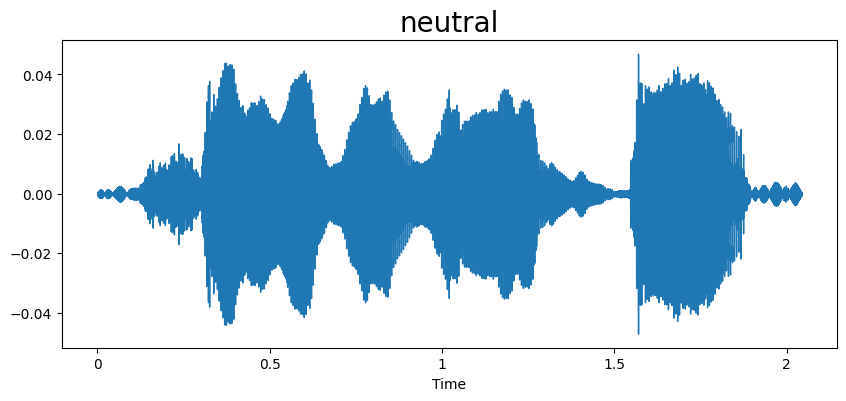

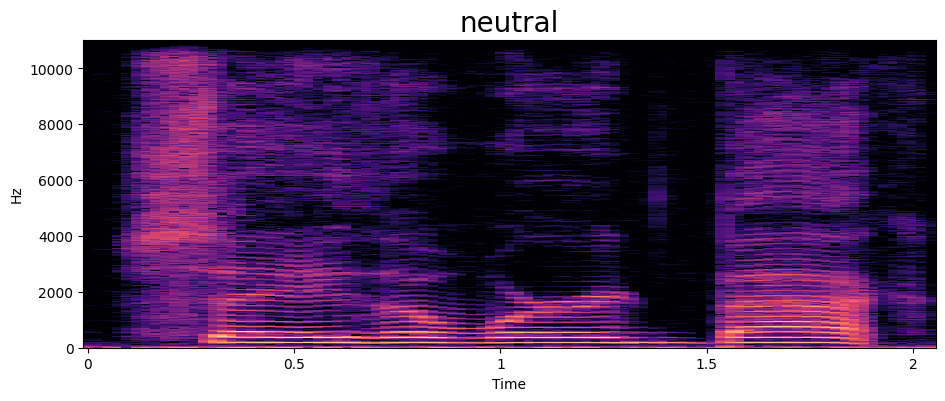

In [16]:
emotion = 'neutral'
p = df['path'][df['emotion']==emotion].iloc[0]
data, sampling_rate = librosa.load(p)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(p)

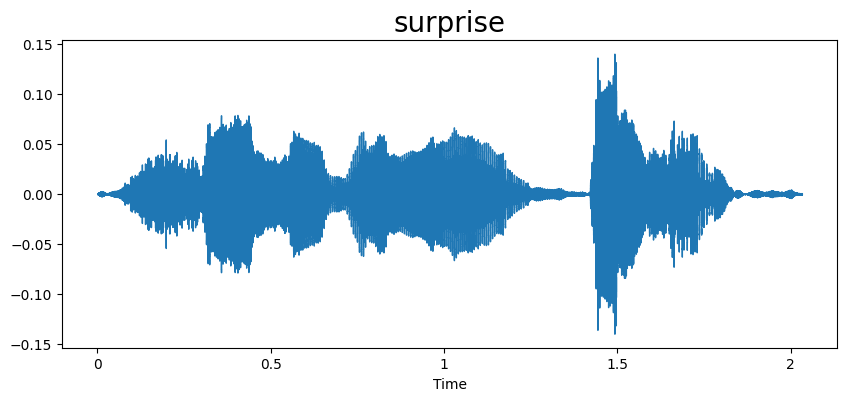

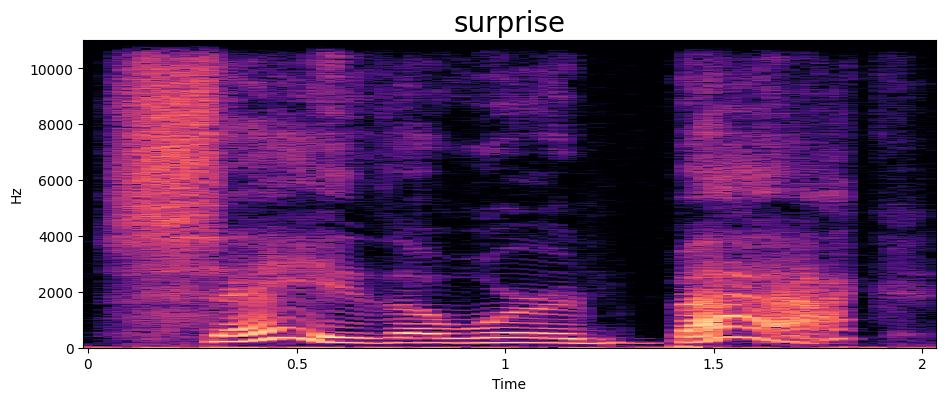

In [17]:
emotion = 'surprise'
p = df['path'][df['emotion']==emotion].iloc[0]
data, sampling_rate = librosa.load(p)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(p)

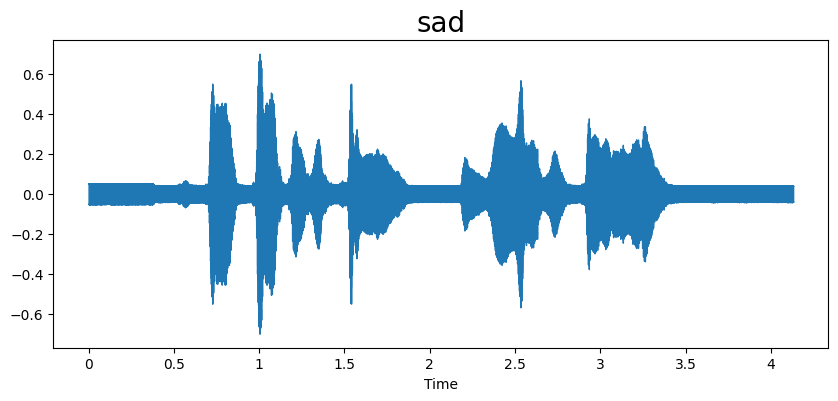

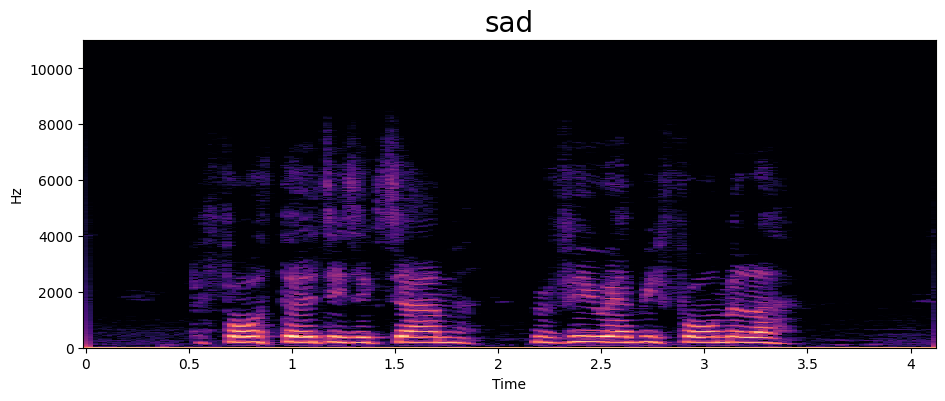

In [18]:
emotion = 'sad'
p = df['path'][df['emotion']==emotion].iloc[405]
data, sampling_rate = librosa.load(p)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(p)

### Feature Extraction

In [19]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc
    

In [20]:
extract_mfcc(df['path'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275601e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57366073e-01, -1.83255339e+00,  2.02101454e-01,
        7.27551103e-01,  1.31773746e+00,  2.88633752e+00,  2.85579062e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115955e+00, -1.02398405e+01,
       -7.55126190e+00, -1.79688025e+00, -7.03765249e+00,  9.43658352e+00,
        8.35585308e+00,  2.17123604e+01,  1.92169914e+01,  2.03489304e+01,
        1.34133663e+01,  8.33917236e+00,  3.94722104e-01,  5.11131477e+00,
        9.56873894e+00,  5.45486832e+00,  2.50996327e+00, -1.82390726e+00,
        4.86896229e+00,  9.31392384e+00,  2.08915043e+00, -1.90649140e+00],
      dtype=float32)

In [21]:
X_mfcc = df['path'].apply(lambda x: extract_mfcc(x))

In [22]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560089, -32.74544, -...
2       [-429.79196, 46.12401, 1.5550476, -0.21709442,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
3275    [-555.8243, 117.21683, 26.249662, 47.466187, 8...
3276    [-529.016, 131.75406, 25.293447, 39.81962, 14....
3277    [-570.3269, 129.49158, 37.857147, 28.908358, 1...
3278    [-531.93134, 113.948814, 19.89846, 24.73417, -...
3279    [-541.2516, 127.30222, 26.700256, 28.051023, -...
Name: path, Length: 3280, dtype: object

In [23]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape


(3280, 40)

In [24]:
## input split
X = np.expand_dims(X, -1)
X.shape

(3280, 40, 1)

In [25]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y = encoder.fit_transform(df[['emotion']])

In [26]:
y = y.toarray()

In [27]:
y.shape

(3280, 7)

In [28]:
import joblib
joblib.dump(encoder, 'saved_model/encoder.pkl')

['saved_model/encoder.pkl']

## LSTM model

In [29]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [31]:
# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath='saved_model/ser_model.h5',    # Path to save the model file
    monitor='val_accuracy',      # Metric to monitor
    verbose=1,                   # Verbosity mode
    save_best_only=True,         # Save only the best model
    mode='max'                   # Mode for the monitored metric
)

In [32]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=512, shuffle=True, callbacks=[checkpoint])

Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 1.9052 - accuracy: 0.2191
Epoch 1: val_accuracy improved from -inf to 0.30793, saving model to saved_model\ser_model.h5
6/6 [==============================] - 6s 451ms/step - loss: 1.9052 - accuracy: 0.2191 - val_loss: 1.8074 - val_accuracy: 0.3079
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 1.7890 - accuracy: 0.2969
Epoch 2: val_accuracy improved from 0.30793 to 0.38415, saving model to saved_model\ser_model.h5
6/6 [==============================] - 2s 360ms/step - loss: 1.7890 - accuracy: 0.2969 - val_loss: 1.6733 - val_accuracy: 0.3841
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 1.6520 - accuracy: 0.3872
Epoch 3: val_accuracy improved from 0.38415 to 0.48933, saving model to saved_model\ser_model.h5
6/6 [==============================] - 2s 383ms/step - loss: 1.6520 - accuracy: 0.3872 - val_loss: 1.4960 - val_accuracy: 0.4893
Epoch 4/100
6/6 [=============================

In [33]:
# PREDICTING ON TEST DATA
y_pred = model.predict(X_test)

21/21 [==============================] - 1s 15ms/step


In [34]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

In [35]:
cm = confusion_matrix(y_test_classes, y_pred_classes)

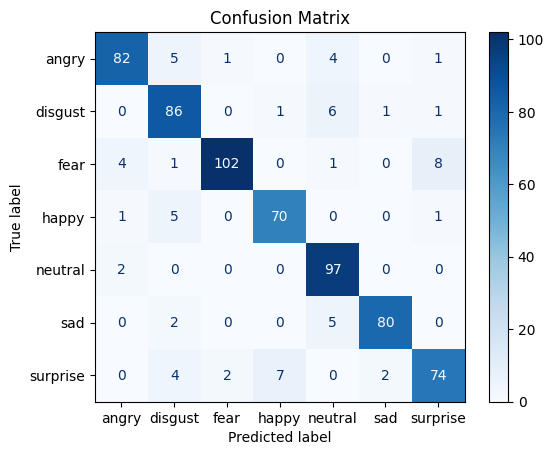

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.categories_[0])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [37]:
report = classification_report(y_test_classes, y_pred_classes, target_names=encoder.categories_[0])
print(report)

              precision    recall  f1-score   support

       angry       0.92      0.88      0.90        93
     disgust       0.83      0.91      0.87        95
        fear       0.97      0.88      0.92       116
       happy       0.90      0.91      0.90        77
     neutral       0.86      0.98      0.92        99
         sad       0.96      0.92      0.94        87
    surprise       0.87      0.83      0.85        89

    accuracy                           0.90       656
   macro avg       0.90      0.90      0.90       656
weighted avg       0.90      0.90      0.90       656



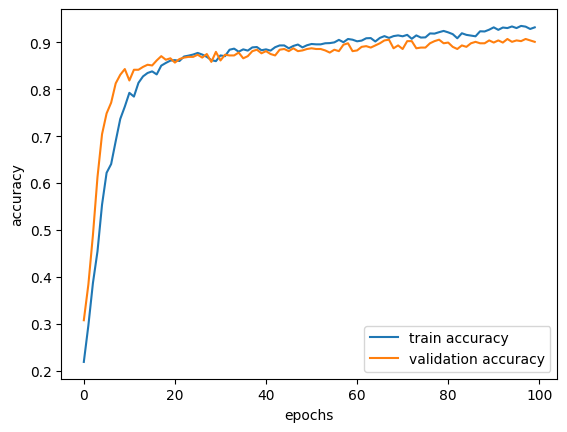

In [38]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

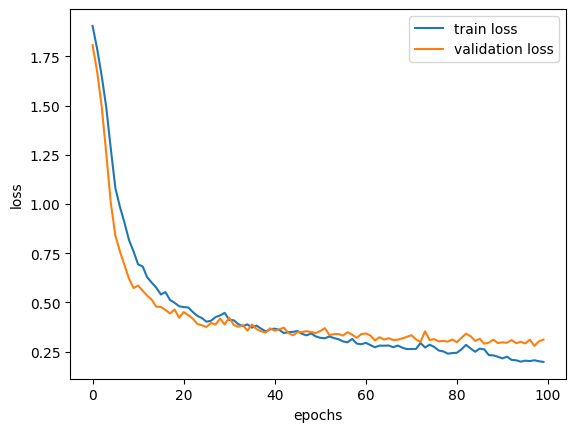

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()